In [2]:
import os
import json
import smopy
import ijson
import folium
import requests
import mplleaflet
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import geopandas as gpd
from pandas import compat
from folium import plugins
from pandas import read_csv
import matplotlib.pyplot as plt 
import folium.plugins as plugins
from folium.plugins import MarkerCluster

%matplotlib inline 

## User 1

# Parsing CSV file for User 1

In [3]:
path = './INPUT_FOLDER/1107.csv'
dg = read_csv(path, sep=';', na_values=".")

## Joint Probability

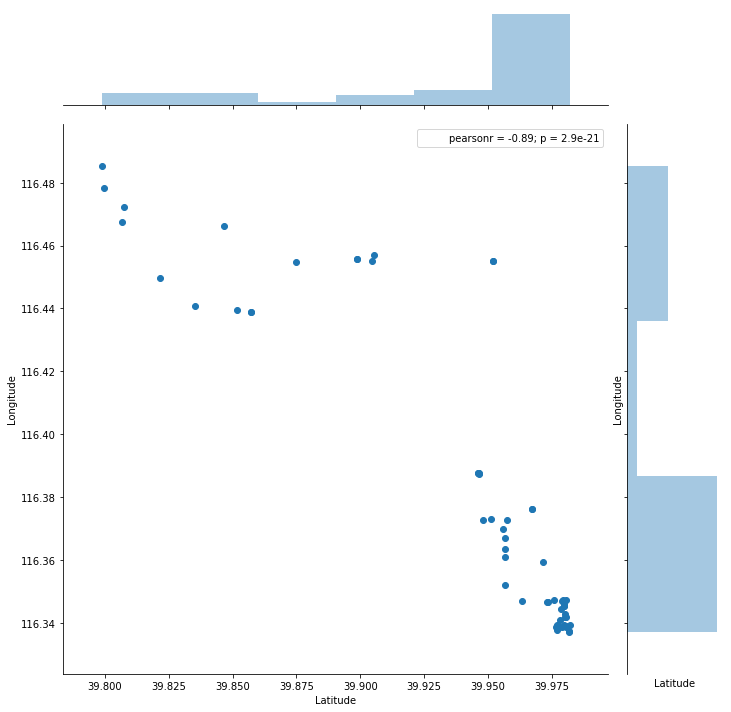

In [4]:
plt.figure(figsize=(15,18))
x = dg.Latitude
y = dg.Longitude
z = sns.jointplot(x,y,size=10) #Draw a bivariate plot of x and y
plt.ylabel('Longitude')
plt.xlabel('Latitude')
z.savefig('./Map_points/joint_pl1.png')
plt.show()

## Kernel density estimation

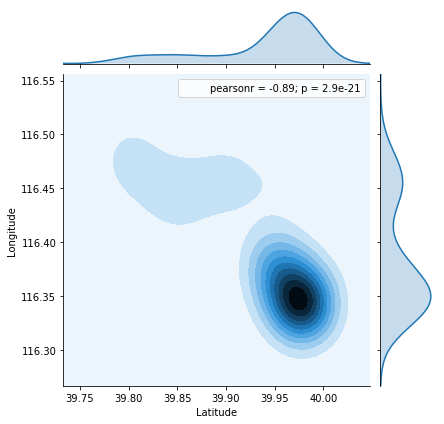

In [5]:
a = sns.jointplot(x, y, data=dg, kind="kde");  #kde - Kernel Density Estimation
a.savefig('./Map_points/joint1.png')

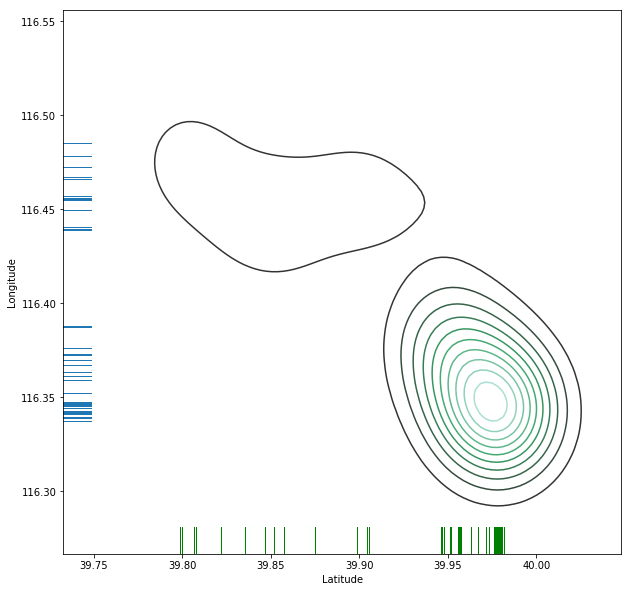

In [6]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(dg.Latitude, dg.Longitude, ax=ax)
sns.rugplot(dg.Latitude, color="g", ax=ax)
sns.rugplot(dg.Longitude, vertical=True, ax=ax);
f.savefig('./Map_points/rug1.png')

# Joint kernel density estimate

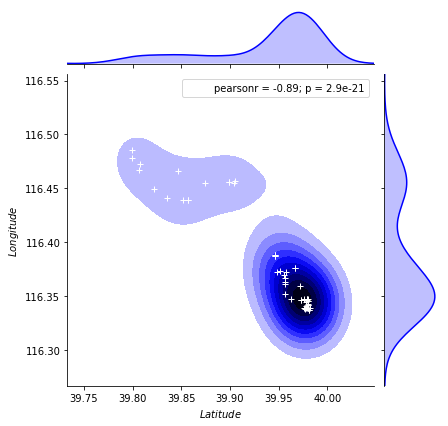

In [7]:
g = sns.jointplot(x, y, data=dg, kind="kde", color="b")  # kde is Kernel density estimation
g.plot_joint(plt.scatter, c="w", s=44, linewidth=1, marker="+") # Show the joint distribution using kernel density estimation
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Latitude$", "$Longitude$");
g.savefig('./Map_points/joint_plot1.png')

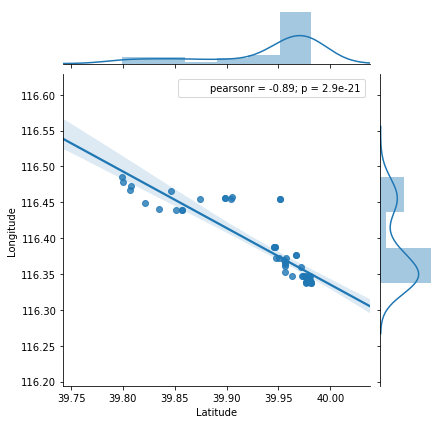

In [8]:
g = sns.JointGrid(x, y, data=dg) 
g.plot_joint(sns.regplot, order=1) 
g.plot_marginals(sns.distplot)
g.annotate(stats.pearsonr)
g.savefig('./Map_points/joint_grid1.png')

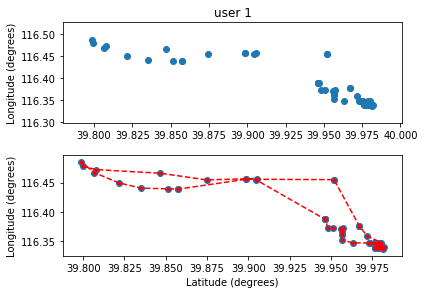

In [9]:
plt.figure(figsize = (40,40))
fig, ax = plt.subplots(nrows=2, ncols=2)

plt.subplot(2, 1, 1)
plt.scatter(dg.Latitude, dg.Longitude)
plt.tight_layout()
title = 'map_user10'
plt.title("user 1")
plt.ylabel('Longitude (degrees)')

plt.subplot(2, 1, 2)
plt.plot(dg.Latitude, dg.Longitude, '.r--')
plt.scatter(dg.Latitude, dg.Longitude)
plt.tight_layout()
plt.savefig(title+'.png', bbox_inches='tight')
plt.ylabel('Longitude (degrees)')
plt.xlabel('Latitude (degrees)')
plt.show()

In [10]:
m = folium.Map(
    location=[39.951850, 116.455150],
    zoom_start=11
)

marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=True,
    icon_create_function=None
)
    
for k in range(len(dg.Latitude)):
    location = dg.Latitude[k], dg.Longitude[k]
    marker = folium.Marker(location=location)
    popup = 'Date:{}<br>Time:{}<br>Latitude:{}<br>Longitude:{}'.format(dg.Date[k], dg.Time[k], dg.Latitude[k], dg.Longitude[k])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(m)

folium.LayerControl().add_to(m)
m.save('./Map_trajectory/mapping_user1.html')
m

In [25]:
m = folium.Map(
    location=[39.951850, 116.455150],
    zoom_start=12
)

lines = [
    {
        'coordinates': [
            [116.338800,39.977783],
            [116.339383,39.988800],
            ],
        'dates': [
            '2017-08-05T01:33:30',
            '2017-08-05T01:40:07',
        ],
        'color': 'red'
    },
    {
        'coordinates': [    
            [116.339383,39.988800],
            [116.338750,39.978917],
        ],
        'dates': [
            '2017-08-05T01:40:07',
            '2017-08-05T01:45:22',
        ],
        'color': 'green'
    },
    {
        'coordinates': [    
            [116.338750,39.978917],
            [116.337467,39.981717]
            ],
        'dates': [
            '2017-08-05T01:45:22',
            '2017-08-05T01:50:26'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            [116.337467,39.981717],
            [116.337217,39.981767]
            ],
        'dates': [
            '2017-08-05T01:50:26',
            '2017-08-05T02:17:08'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.337217,39.981767],
            [116.339433,39.981883]
            ],
        'dates': [
            '2017-08-05T02:17:08',
            '2017-08-05T02:20:15'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.339433,39.981883],
            [116.341783,39.980450]
            ],
        'dates': [
            '2017-08-05T02:20:15',
            '2017-08-05T02:25:16'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            
            [116.341783,39.980450],
            [116.345433,39.979833]
            ],
        'dates': [
            '2017-08-05T02:25:16',
            '2017-08-05T02:30:07'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345433,39.979833],
            [116.347367,39.979300]
            ],
        'dates': [
            '2017-08-05T02:30:07',
            '2017-08-05T04:03:17'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.347367,39.979300],
            [116.342017,39.979983]
            ],
        'dates': [
            '2017-08-05T04:03:17',
            '2017-08-05T04:07:36'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.342017,39.979983],
            [116.343050,39.980450]
            ],
        'dates': [
            '2017-08-05T04:07:36',
            '2017-08-05T04:11:27'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.343050,39.980450],
            [116.338817,39.980467]
            ],
        'dates': [
            '2017-08-05T04:11:27',
            '2017-08-05T04:33:53'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.338817,39.980467],
            [116.339317,39.979833]
            ],
        'dates': [
            '2017-08-05T04:33:53',
            '2017-08-05T04:35:06'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.339317,39.979833],
            [116.342883,39.979917]
            ],
        'dates': [
            '2017-08-05T04:35:06',
            '2017-08-05T04:40:23'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [

            [116.342883,39.979917], 
            [116.345433,39.979750]
            ],
        'dates': [
            '2017-08-05T04:40:23',
            '2017-08-05T04:43:35'
        ],
        'color': 'red'
    },
    {
        'coordinates': [

            [116.345433,39.979750],
            [116.346050,39.979650]
            ],
        'dates': [
            '2017-08-05T04:43:35',
            '2017-08-05T07:25:01'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            
            [116.346050,39.979650],
            [116.347033,39.978750]
            ],
        'dates': [
            '2017-08-05T07:25:01',
            '2017-08-05T07:28:00'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.347033,39.978750],         
            [116.347350,39.975800]
            ],
        'dates': [
            '2017-08-05T07:28:00',
            '2017-08-05T07:32:02'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            
            [116.347350,39.975800],
            [116.346617,39.973350]
            ],
        'dates': [
            '2017-08-05T07:32:02',
            '2017-08-05T07:36:53'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.346617,39.973350],
            [116.346667,39.973100]
            ],
        'dates': [
            '2017-08-05T07:36:53',
            '2017-08-05T07:45:13'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.346667,39.973100],
            [116.346883,39.963083]
            ],
        'dates': [
            '2017-08-05T07:45:13',
            '2017-08-05T07:48:11'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            
            [116.346883,39.963083],
            [116.352183,39.956533]
            ],
        'dates': [
            '2017-08-05T07:48:11',
            '2017-08-05T07:51:16'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.352183,39.956533],
            [116.361117,39.956700]
            ],
        'dates': [
            '2017-08-05T07:51:16',
            '2017-08-05T07:55:50'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.361117,39.956700],
            [116.363483,39.956767]
            ],
        'dates': [
            '2017-08-05T07:55:50',
            '2017-08-05T08:00:24'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.363483,39.956767],
            [116.367033,39.956650]
            ],
        'dates': [
            '2017-08-05T08:00:24',
            '2017-08-05T08:04:48'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            
            [116.367033,39.956650],
            [116.369983,39.955783]
            ],
        'dates': [
            '2017-08-05T08:04:48',
            '2017-08-05T08:17:16'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.369983,39.955783],
            [116.372700,39.957300]
            ],
        'dates': [
            '2017-08-05T08:17:16',
            '2017-08-05T08:22:16'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.372700,39.957300],
            [116.372983,39.950967]
            ],
        'dates': [
            '2017-08-05T08:22:16',
            '2017-08-05T08:32:09'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [ 
            [116.372983,39.950967],
            [116.372650,39.948050]
            ],
        'dates': [
            '2017-08-05T08:32:09',
            '2017-08-05T08:35:17'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.372650,39.948050],
            [116.387417,39.946600]
            ],
        'dates': [
            '2017-08-05T08:35:17',
            '2017-08-05T08:40:36'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            
            [116.387417,39.946600],
            [116.387533,39.946283]
            ],
        'dates': [
            '2017-08-05T08:40:36',
            '2017-08-05T08:56:35'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.387533,39.946283],
            [116.387783,39.946133]
            ],
        'dates': [
            '2017-08-05T08:56:35',
            '2017-08-05T09:00:52'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.387783,39.946133],
            [116.455133,39.904517]
            ],
        'dates': [
            '2017-08-05T09:00:52',
            '2017-08-05T09:48:30'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            
            [116.455133,39.904517],
            [116.457117,39.905467]
            ],
        'dates': [
            '2017-08-05T09:48:30',
            '2017-08-05T09:52:00'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            
            [116.457117,39.905467],
            [116.454767,39.874733]
            ],
        'dates': [
            '2017-08-05T09:52:00',
            '2017-08-05T09:59:35'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.454767,39.874733],
            [116.466167,39.846700]
            ],
        'dates': [
            '2017-08-05T09:59:35',
            '2017-08-05T10:04:09'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            
            [116.466167,39.846700],
            [116.472383,39.807650]
            ],
        'dates': [
            '2017-08-05T10:04:09',
            '2017-08-05T10:10:28'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.472383,39.807650],
            [116.478350,39.799683]
            ],
        'dates': [
            '2017-08-05T10:10:28',
            '2017-08-05T10:14:55'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            
            [116.478350,39.799683],
            [116.485367,39.798917]
            ],
        'dates': [
            '2017-08-05T10:14:55',
            '2017-08-05T10:19:17'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.485367,39.798917],
            [116.467367,39.806583]
            ],
        'dates': [
            '2017-08-05T10:19:17',
            '2017-08-05T10:37:12'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.467367,39.806583],
            [116.449583,39.821667]
            ],
        'dates': [
            '2017-08-05T10:37:12',
            '2017-08-05T10:41:51'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.449583,39.821667],
            [116.440650,39.835167]
            ],
        'dates': [
            '2017-08-05T10:41:51',
            '2017-08-05T10:50:34'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.440650,39.835167],
            [116.439400,39.851550]
            ],
        'dates': [
            '2017-08-05T10:50:34',
            '2017-08-05T10:55:07'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.439400,39.851550],
            [116.438917,39.857333]
            ],
        'dates': [
            '2017-08-05T10:55:07',
            '2017-08-05T11:02:44'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            
            [116.438917,39.857333],
            [116.455867,39.898667]
            ],
        'dates': [
            '2017-08-05T11:02:44',
            '2017-08-05T11:11:15'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            
            [116.455867,39.898667],
            [116.455150,39.951850]
            ],
        'dates': [
            '2017-08-05T11:11:15',
            '2017-08-05T11:20:00'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            
            [116.455150,39.951850],
            [116.376283,39.967083]
            ],
        'dates': [
            '2017-08-05T11:20:00',
            '2017-08-05T11:30:24'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.376283,39.967083],
            [116.359283,39.971667]
            ],
        'dates': [
            '2017-08-05T11:30:24',
            '2017-08-05T11:40:13'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            
            [116.359283,39.971667],
            [116.347333,39.980350]
            ],
        'dates': [
            '2017-08-05T11:40:13',
            '2017-08-05T11:50:21'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            
            [116.347333,39.980350],
            [116.344417,39.978617]
            ],
        'dates': [
            '2017-08-05T11:50:21',
            '2017-08-05T15:45:08'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.344417,39.978617],
            [116.340933,39.977950]
            ],
        'dates': [
            '2017-08-05T15:45:08',
            '2017-08-05T15:50:14'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            
            [116.340933,39.977950],
            [116.338800,39.976550]
            ],
        'dates': [
            '2017-08-05T15:50:14',
            '2017-08-05T15:55:19'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            
            [116.338800,39.976550],
            [116.337600,39.976967]
        ],
        'dates': [
            '2017-08-05T15:55:19',
            '2017-08-05T15:01:20'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.337600,39.976967],
            [116.205999, 39.905923],
        ],
        'dates': [
            '2017-08-05T15:01:20',
            '2017-08-05T15:11:20'
        ],
        'color': 'black'
    },
    
]


features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                #'color': line['color'],
                'color' : 'red',
                'weight': line['weight'] if 'weight' in line else 4
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', loop=True, add_last_point=True).add_to(m)

m.save('./Map_trajectory/animated_user1.html')

m

# User 2

# Parsing CSV file for User 2

In [12]:
path1 = './INPUT_FOLDER/E1208.csv'
dd = read_csv(path1, sep=';', na_values=".")

## Joint Probability

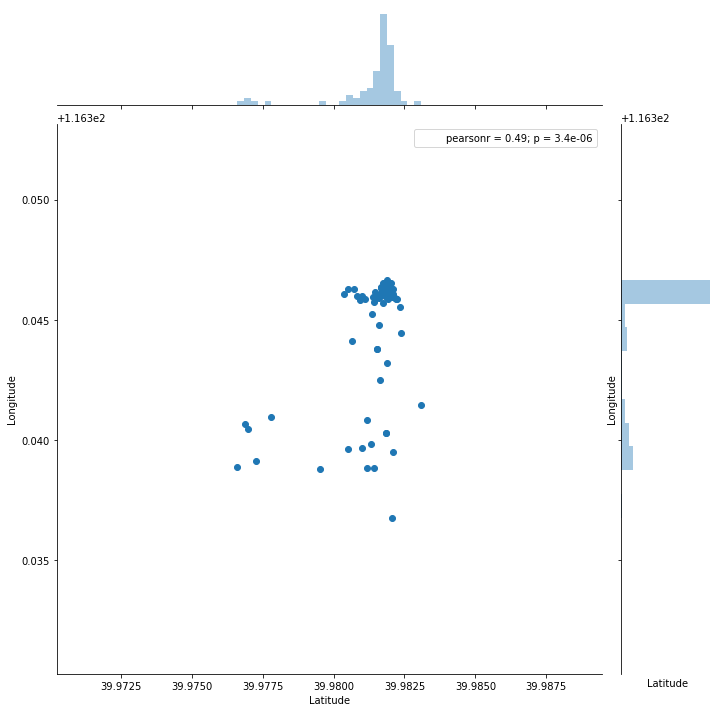

In [13]:
plt.figure(figsize=(15,18))
x = dd.Latitude
y = dd.Longitude
z = sns.jointplot(x,y,size=10)
plt.ylabel('Longitude')
plt.xlabel('Latitude')
z.savefig('./Map_points/joint_p21.png')
plt.show()

## Kernel density estimation

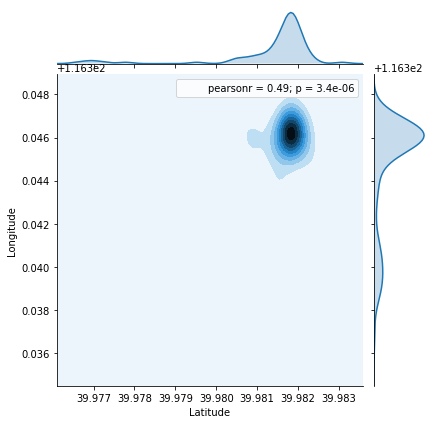

In [14]:
a = sns.jointplot(x, y, data=dd, kind="kde");
a.savefig('./Map_points/joint2.png')

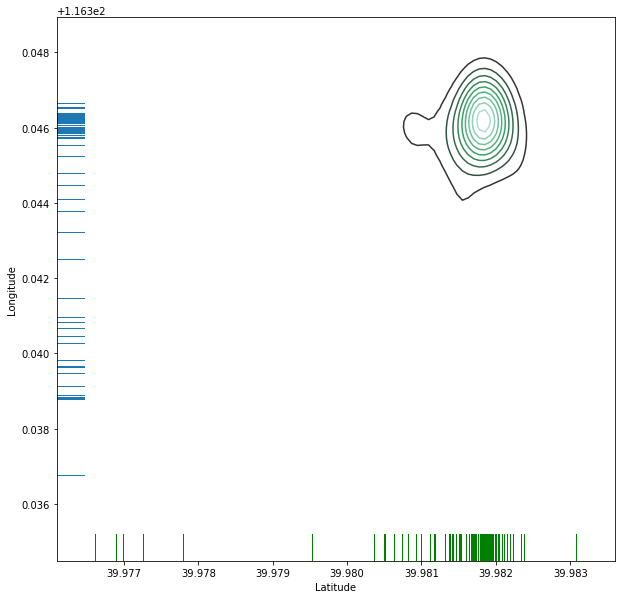

In [15]:
f, ax = plt.subplots(figsize=(10, 10))
sns.kdeplot(dd.Latitude, dd.Longitude, ax=ax)
sns.rugplot(dd.Latitude, color="g", ax=ax)
sns.rugplot(dd.Longitude, vertical=True, ax=ax);  #ax - Axis
f.savefig('./Map_points/rug2.png')

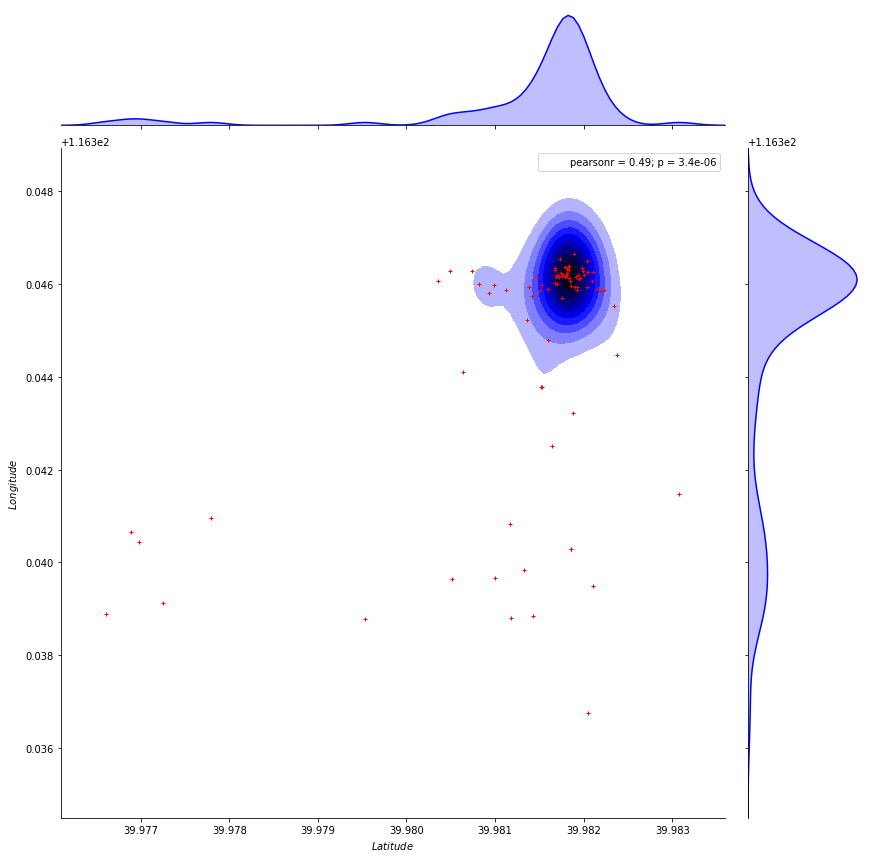

In [16]:
g = sns.jointplot(x, y, data=dd, kind="kde", size=12, color="b")
g.plot_joint(plt.scatter, c="r", s=20, linewidth=1, marker="+") #Is the Size of the marker'+'
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Latitude$", "$Longitude$");
g.savefig('./Map_points/joint_plot22.png')

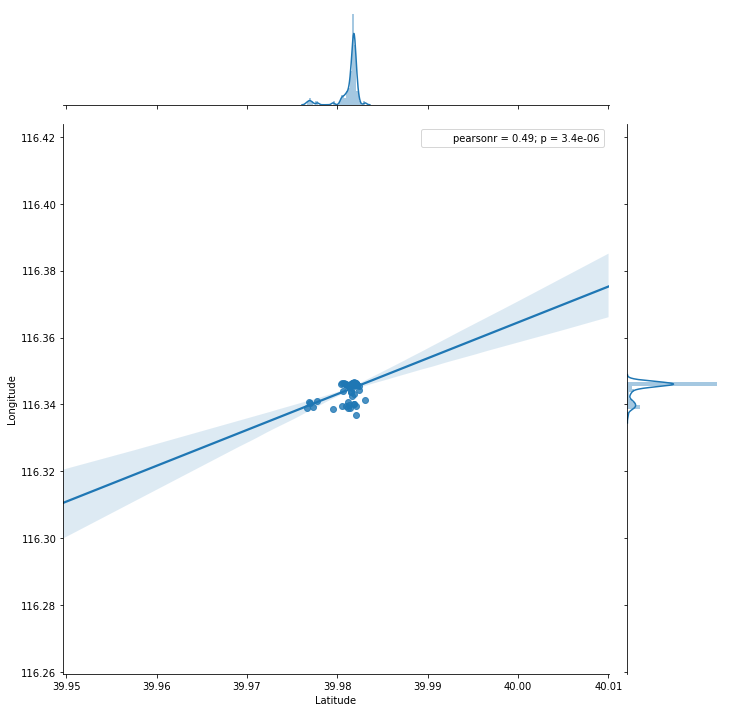

In [17]:
g = sns.JointGrid(x, y, data=dd, size=10) 
g.plot_joint(sns.regplot, order=1) 
g.plot_marginals(sns.distplot)
g.annotate(stats.pearsonr)
g.savefig('./Map_points/joint_grid2.png')

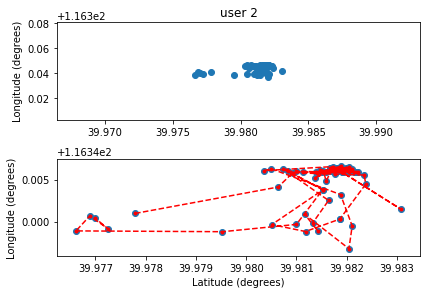

In [18]:
plt.figure(figsize = (40,40))
fig, ax = plt.subplots(nrows=2, ncols=2)

plt.subplot(2, 1, 1)
plt.scatter(dd.Latitude, dd.Longitude)
plt.tight_layout()
title = 'map_user20'
plt.title("user 2")
plt.ylabel('Longitude (degrees)')

plt.subplot(2, 1, 2)
plt.plot(dd.Latitude, dd.Longitude, '.r--')
plt.scatter(dd.Latitude, dd.Longitude)
plt.tight_layout()
plt.savefig(title+'.png', bbox_inches='tight')
plt.ylabel('Longitude (degrees)')
plt.xlabel('Latitude (degrees)')
plt.show()

In [19]:
m = folium.Map(
    location=[39.981638,116.342509],
    zoom_start=13
)

marker_cluster = MarkerCluster(
    name='clustered icons',
    overlay=True,
    control=True,
    icon_create_function=None
)
    
for i in range(len(dd.Latitude)):
    location = dd.Latitude[i], dd.Longitude[i]
    marker = folium.Marker(location=location)
    popup = 'Date:{}<br>Time:{}<br>Latitude:{}<br>Longitude:{}'.format(dd.Date[i], dd.Time[i], dd.Latitude[i], dd.Longitude[i])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)

marker_cluster.add_to(m)

folium.LayerControl().add_to(m)
m.save('./Map_trajectory/mapping_user2.html')
m

In [24]:
m = folium.Map(
    location=[39.972238, 116.342309],
    zoom_start=13
)

lines = [
    {
        'coordinates': [
            [116.340965,39.97779],
            [116.344106,39.980635],
        ],
        'dates': [
            '2017-12-16T01:00:33',
            '2017-12-16T01:05:23'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.344106,39.980635],
            [116.345811,39.980928],
        ],
        'dates': [
            '2017-12-16T01:05:23',
            '2017-12-16T01:07:43'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345811,39.980928],
            [116.345531,39.982345]
        ],
        'dates': [
            '2017-12-16T01:07:43',
            '2017-12-16T03:42:56'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345531,39.982345],
            [116.344465,39.982379]
        ],
        'dates': [
            '2017-12-16T03:42:56',
            '2017-12-16T03:45:01'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.344465,39.982379],
            [116.340291,39.981862]
        ],
        'dates': [
            '2017-12-16T03:45:01',
            '2017-12-16T03:49:11'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.340291,39.981862],
            [116.338813,39.98118]
        ],
        'dates': [
            '2017-12-16T03:49:11',
            '2017-12-16T03:55:06'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.338813,39.98118],
            [116.339637,39.980509]
        ],
        'dates': [
            '2017-12-16T03:55:06',
            '2017-12-16T04:11:36'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.339637,39.980509],
            [116.343793,39.981532]
        ],
        'dates': [
            '2017-12-16T04:11:36',
            '2017-12-16T04:16:06'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.343793,39.981532],
            [116.346284,39.980736]
        ],
        'dates': [
            '2017-12-16T04:16:06',
            '2017-12-16T04:18:56'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.346284,39.980736],
            [116.342509,39.981638]
        ],
        'dates': [
            '2017-12-16T04:18:56',
            '2017-12-16T09:33:42'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.342509,39.981638],
            [116.339833,39.981323]
        ],
        'dates': [
            '2017-12-16T09:33:42',
            '2017-12-16T09:36:02'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.339833,39.981323],
            [116.338837,39.981429]
        ],
        'dates': [
            '2017-12-16T09:36:02',
            '2017-12-16T09:40:02'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.338837,39.981429],
            [116.340839,39.981167]
        ],
        'dates': [
            '2017-12-16T09:40:02',
            '2017-12-16T09:44:07'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.340839,39.981167],
            [116.336765,39.982044]
        ],
        'dates': [
            '2017-12-16T09:44:07',
            '2017-12-16T10:14:37'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.336765,39.982044],
            [116.339483,39.982108]
        ],
        'dates': [
            '2017-12-16T10:14:37',
            '2017-12-16T10:19:32'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.339483,39.982108],
            [116.343213,39.981876]
        ],
        'dates': [
            '2017-12-16T10:19:32',
            '2017-12-16T10:24:47'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.343213,39.981876],
            [116.346278,39.980496]
        ],
        'dates': [
            '2017-12-16T10:24:47',
            '2017-12-16T10:28:42'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346278,39.980496],
            [116.346059,39.980361]
        ],
        'dates': [
            '2017-12-16T10:28:42',
            '2017-12-16T10:39:37'
        ],
        'color': 'red'
    }, 
    {
        'coordinates': [
            [116.346059,39.980361],
            [116.346542,39.981733]
        ],
        'dates': [
            '2017-12-16T10:39:37',
            '2017-12-16T10:43:37'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            [116.346542,39.981733],
            [116.341467,39.983078]
        ],
        'dates': [
            '2017-12-16T10:43:37',
            '2017-12-16T10:47:12'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.341467,39.983078],
            [116.346131,39.981833]
        ],
        'dates': [
            '2017-12-16T10:47:12',
            '2017-12-16T10:50:22'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.346131,39.981833],
            [116.346659,39.981891]
        ],
        'dates': [
            '2017-12-16T10:50:22',
            '2017-12-16T10:56:07'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.346659,39.981891],
            [116.346252,39.981739]
        ],
        'dates': [
            '2017-12-16T10:56:07',
            '2017-12-16T10:59:27'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346252,39.981739],
            [116.345977,39.981535]
        ],
        'dates': [
            '2017-12-16T10:59:27',
            '2017-12-16T11:04:42'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345977,39.981535],
            [116.344799,39.981593]
        ],
        'dates': [
            '2017-12-16T11:04:42',
            '2017-12-16T11:08:32'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.344799,39.981593],
            [116.346153,39.981692]
        ],
        'dates': [
            '2017-12-16T11:08:32',
            '2017-12-16T11:15:17'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346153,39.981692],
            [116.346385,39.981837]
        ],
        'dates': [
            '2017-12-16T11:15:17',
            '2017-12-16T11:19:52'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346385,39.981837],
            [116.346277,39.981993]
        ],
        'dates': [
            '2017-12-16T11:19:52',
            '2017-12-16T11:25:22'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            [116.346277,39.981993],
            [116.346136,39.981963]
        ],
        'dates': [
            '2017-12-16T11:25:22',
            '2017-12-16T11:30:12'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346136,39.981963],
            [116.346197,39.981698]
        ],
        'dates': [
            '2017-12-16T11:30:12',
            '2017-12-16T11:34:52'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346197,39.981698],
            [116.346268,39.982106]
        ],
        'dates': [
            '2017-12-16T11:34:52',
            '2017-12-16T11:43:47'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346268,39.982106],
            [116.346204,39.981764]
        ],
        'dates': [
            '2017-12-16T11:43:47',
            '2017-12-16T11:47:02'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.346204,39.981764],
            [116.346159,39.98179]
        ],
        'dates': [
            '2017-12-16T11:47:02',
            '2017-12-16T11:50:22'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.346159,39.98179],
            [116.346507,39.982035]
        ],
        'dates': [
            '2017-12-16T11:50:22',
            '2017-12-16T11:55:42'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.346507,39.982035],
            [116.346205,39.981934]
        ],
        'dates': [
            '2017-12-16T11:55:42',
            '2017-12-16T11:59:07'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346205,39.981934],
            [116.346076,39.982089]
        ],
        'dates': [
            '2017-12-16T11:59:07',
            '2017-12-16T12:06:57'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346076,39.982089],
            [116.346023,39.981673]
        ],
        'dates': [
            '2017-12-16T12:06:57',
            '2017-12-16T12:10:12'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346023,39.981673],
            [116.346374,39.981819]
        ],
        'dates': [
            '2017-12-16T12:10:12',
            '2017-12-16T12:15:07'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            [116.346374,39.981819],
            [116.345951,39.981902]
        ],
        'dates': [
            '2017-12-16T12:15:07',
            '2017-12-16T12:25:17'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345951,39.981902],
            [116.346198,39.982003]
        ],
        'dates': [
            '2017-12-16T12:25:17',
            '2017-12-16T12:30:12'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.346198,39.982003],
            [116.346355,39.981681]
        ],
        'dates': [
            '2017-12-16T12:30:12',
            '2017-12-16T12:34:57'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346355,39.981681],
            [116.34626,39.982048]
        ],
        'dates': [
            '2017-12-16T12:34:57',
            '2017-12-16T12:39:17'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.34626,39.982048],
            [116.346067,39.981851]
        ],
        'dates': [
            '2017-12-16T12:39:17',
            '2017-12-16T12:49:02'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.346067,39.981851],
            [116.346196,39.981811]
        ],
        'dates': [
            '2017-12-16T12:49:02',
            '2017-12-16T12:52:32'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.346196,39.981811],
            [116.346162,39.981916]
        ],
        'dates': [
            '2017-12-16T12:52:32',
            '2017-12-16T12:55:12'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346162,39.981916],
            [116.346327,39.981815]
        ],
        'dates': [
            '2017-12-16T12:55:12',
            '2017-12-16T13:07:12'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.346327,39.981815],
            [116.345859,39.982192]
        ],
        'dates': [
            '2017-12-16T13:07:12',
            '2017-12-16T13:09:17'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345859,39.982192],
            [116.346149,39.981719]
        ],
        'dates': [
            '2017-12-16T13:09:17',
            '2017-12-16T13:13:07'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346149,39.981719],
            [116.346198,39.981804]
        ],
        'dates': [
            '2017-12-16T13:13:07',
            '2017-12-16T13:17:17'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.346198,39.981804],
            [116.345713,39.981758]
        ],
        'dates': [
            '2017-12-16T13:17:17',
            '2017-12-16T13:23:37'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345713,39.981758],
            [116.345931,39.982043]
        ],
        'dates': [
            '2017-12-16T13:23:37',
            '2017-12-16T13:28:07'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            [116.345931,39.982043],
            [116.346369,39.981789]
        ],
        'dates': [
            '2017-12-16T13:28:07',
            '2017-12-16T13:31:32'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.346369,39.981789],
            [116.346179,39.981755]
        ],
        'dates': [
            '2017-12-16T13:31:32',
            '2017-12-16T13:35:12'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346179,39.981755],
            [116.345235,39.981365]
        ],
        'dates': [
            '2017-12-16T13:35:12',
            '2017-12-16T13:50:28'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345235,39.981365],
            [116.346235,39.981816]
        ],
        'dates': [
            '2017-12-16T13:50:28',
            '2017-12-16T13:55:08'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.346235,39.981816],
            [116.346113,39.981947]
        ],
        'dates': [
            '2017-12-16T13:55:08',
            '2017-12-16T13:59:33'
        ],
        'color': 'yellow'
    },
    {
        'coordinates': [
            [116.346113,39.981947],
            [116.346347,39.981986]
        ],
        'dates': [
            '2017-12-16T13:59:33',
            '2017-12-16T14:00:59'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.346347,39.981986],
            [116.346311,39.981835]
        ],
        'dates': [
            '2017-12-16T14:00:59',
            '2017-12-16T14:05:34'
        ],
        'color': 'orange'
    },
    {
        'coordinates': [
            [116.346311,39.981835],
            [116.345945,39.981925]
        ],
        'dates': [
            '2017-12-16T14:05:34',
            '2017-12-16T14:10:54'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.345945,39.981925],
            [116.345962,39.981857]
        ],
        'dates': [
            '2017-12-16T14:10:54',
            '2017-12-16T14:15:59'
        ],
        'color': 'white'
    },
    {
        'coordinates': [
            [116.345962,39.981857],
            [116.34589,39.982151]
        ],
        'dates': [
            '2017-12-16T14:15:59',
            '2017-12-16T14:20:19'
        ],
        'color': 'red'
    },
    {
        'coordinates': [
            [116.34589,39.982151],
            [116.346008,39.981702]
        ],
        'dates': [
            '2017-12-16T14:20:19',
            '2017-12-16T14:22:24'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346008,39.981702],
            [116.346147,39.981469]
        ],
        'dates': [
            '2017-12-16T14:22:24',
            '2017-12-16T14:26:14'
        ],
        'color': 'black'
    },
    {
        'coordinates': [
            [116.346147,39.981469],
            [116.345882,39.982231]
        ],
        'dates': [
            '2017-12-16T14:26:14',
            '2017-12-16T14:30:24'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345882,39.982231],
            [116.346315,39.981674]
        ],
        'dates': [
            '2017-12-16T14:30:24',
            '2017-12-16T14:35:24'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346315,39.981674],
            [116.345865,39.981927]
        ],
        'dates': [
            '2017-12-16T14:35:24',
            '2017-12-16T14:40:54'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345865,39.981927],
            [116.345976,39.980993]
        ],
        'dates': [
            '2017-12-16T14:40:54',
            '2017-12-16T14:45:56'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345976,39.980993],
            [116.345886,39.981504]
        ],
        'dates': [
            '2017-12-16T14:45:56',
            '2017-12-16T14:50:17'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345886,39.981504],
            [116.345938,39.981384] 
        ],
        'dates': [
            '2017-12-16T14:50:17',
            '2017-12-16T14:52:50'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345938,39.981384],
            [116.345749,39.981414]
        ],
        'dates': [
            '2017-12-16T14:52:50',
            '2017-12-16T14:56:47'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345749,39.981414],
            [116.345895,39.981597]
        ],
        'dates': [
            '2017-12-16T14:56:47',
            '2017-12-16T15:00:58'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345895,39.981597],
            [116.345876,39.98112]
        ],
        'dates': [
            '2017-12-16T15:00:58',
            '2017-12-16T15:03:13'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.345876,39.98112],
            [116.346002,39.980822]
        ],
        'dates': [
            '2017-12-16T15:03:13',
            '2017-12-16T15:15:58'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.346002,39.980822],
            [116.343778,39.98152]
        ],
        'dates': [
            '2017-12-16T15:15:58',
            '2017-12-16T15:20:34'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.343778,39.98152],
            [116.339661,39.980999]
        ],
        'dates': [
            '2017-12-16T15:20:34',
            '2017-12-16T15:26:59'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.339661,39.980999],
            [116.33879,39.979528]
        ],
        'dates': [
            '2017-12-16T15:26:59',
            '2017-12-16T15:30:59'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.33879,39.979528],
            [116.338886,39.976614]
        ],
        'dates': [
            '2017-12-16T15:30:59',
            '2017-12-16T15:36:09'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.338886,39.976614],
            [116.340664,39.976888]
        ],
        'dates': [
            '2017-12-16T15:36:09',
            '2017-12-16T15:48:24'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.340664,39.976888],
            [116.339135,39.977253]
        ],
        'dates': [
            '2017-12-16T15:48:24',
            '2017-12-16T15:56:59'
        ],
        'color': 'green'
    },
    {
        'coordinates': [
            [116.339135,39.977253],
            [116.340451,39.976985]
        ],
        'dates': [
            '2017-12-16T15:56:59',
            '2017-12-16T15:59:34'
        ],
        'color': 'green'
    }
]


features = [
    {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': line['coordinates'],
        },
        'properties': {
            'times': line['dates'],
            'style': {
                'color': 'green',
                'weight': line['weight'] if 'weight' in line else 4
            }
        }
    }
    for line in lines
]

plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': features,
}, period='PT1M', loop=True, add_last_point=True).add_to(m)


m.save('./Map_trajectory/animated_user2.html')

m